# Ⅰ. 주요 개념

# 1. BERT

### Transformer 모델
- Self-Attention 으로 이루어진 Encoder-Decoder 구조를 가지고 있어서 번역기 모델 형태를 구현

### BERT
- Transformer Encoder 구조만을 활용
- Layer 개수는 12개 이상으로 늘리고, 전체적으로 파라미터 크기가 훨씬 커지긴 했지만 기본적인 구조는 Transformer Encoder



# 2. BERT의 학습 원리

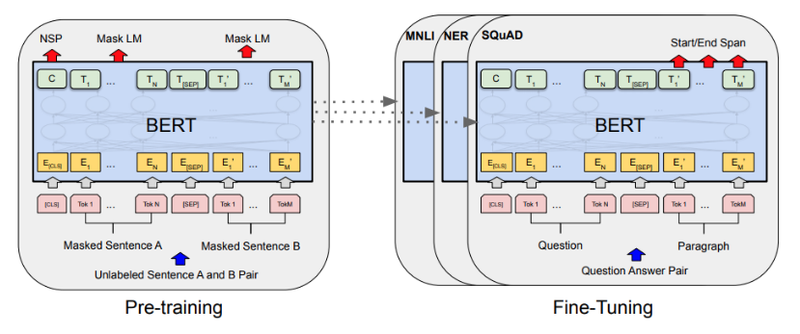

## Mask LM
- 입력 데이터가 "나는 \<mask> 먹었다" 일 때 BERT 모델이 "\<mask>"가 "밥을" 임을 맞출 수 있도록 하는 언어 모델  

##  Next Sentence Prediction
- 입력데이터가 "나는 밥을 먹었다. \<SEP> 그래서 지금 배가 부르다."가 주어졌을 때 "\<SEP>"를 경계로 좌우 두 문장이 순서대로 이어지는 문장이 맞는지를 맞추는 문제.  
- BERT 모델은 이 두 문장을 입력으로 받았을 때 첫 번째 바이트에 NSP 결과값을 리턴  

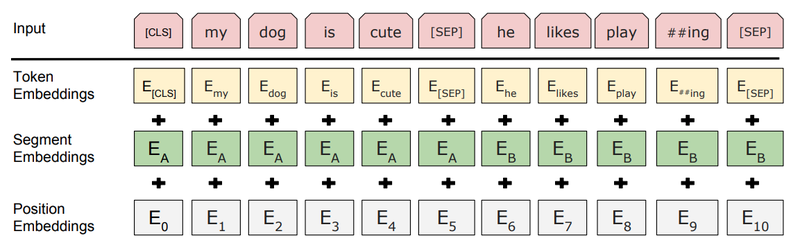
- 여기서 주목할 것은 바로 위 그림에 나타나는 BERT 모델의 입력 부분  
- 텍스트 입력이 위 그림의 [Input]처럼 주어졌을 때, 실제로 모델에 입력되는 것은 Token, Segment, Position Embedding의 3가지가 더해진 형태임.  
- 실제로는 그 이후 layer normalization과 dropout이 추가로 적용됨  

### Token Embedding
- 텍스트의 tokenizer : Word Piece model이라는 subword tokenizer를 사용  
  -  문자(char) 단위로 임베딩하는 것이 기본이지만, 자주 등장하는 긴 길이의 subword도 하나의 단위로 만들어 줌.  
  - 자주 등장하지 않는 단어는 다시 subword 단위로 쪼개짐. 이것은 자주 등장하지 않는 단어가 OOV(Out-of-vocabulary) 처리되는 것을 방지해 주는 장점
  - 최종적으로 Word Piece모델의 각 임베딩이 입력.

### Segment Embedding
- 각 단어가 어느 문장에 포함되는지 그 역할을 규정함.
- 특히 QA 문제처럼 이 단어가 Question 문장에 속하는지, Context 문장에 속하는지 구분이 필요한 경우에 이 임베딩은 매우 유용하게 사용됨.

### Position Embedding
- 기존의 Transformer에서 사용되던 position embedding과 동일

# 3. 데이터 셋

###  SQuAD 데이터셋
- SQuAD 데이터셋은 언어 모델의 성능을 측정하는 가장 표준적인 벤치마크로 인정받고 있음.
  - 자연어처리에 입문하게 되면 흔히는 감성분석 등의 Text Classification, 또는 Encoder-Decoder 구조의 모델을 통한 번역 태스크를 많이 다루게 됨.
  - 그러나 자연어처리 분야에서 기계독해 태스크는 머신이 자연어의 의미를 정확하게 이해하고 사람의 질문에 정확하게 답변할 수 있는지를 측정하는 아주 중요한 분야

### KorQuAD(The Korean Question Answering Dataset, 한국어 질의응답 데이터셋)
- 미국 스탠퍼드 대학에서 구축한 대용량 데이터셋인 SQuAD를 벤치마킹  

###  KorQuAD1.0과 2.0의 주요한 차이점
(1) 문서의 길이 : 지문의 길이가 1.0은 한두 문단 정도지만 2.0은 위키백과 한 페이지 분량   
(2) 문서의 구조 : 2.0에는 표와 리스트가 포함되어 있어 html 태그를 이해할 수 있어야 함   
(3) 답변의 길이와 구조 : 1.0에서는 단어나 구 단위였으나, 2.0에서는 표와 리스트를 포함한 긴 영역의 답변 가능

# Ⅱ. 프로세스와 주요 함수/클래스

# 1. 패키지의 함수/클래스 개요

## (1) tensorflow

  - cast(x, dtype, name=None)
         Casts a tensor to a new type

  - linalg.band_part(input, num_lower, num_upper, name=None)
        Copy a tensor setting everything outside a central band in each innermost matrix to zero.

  - expand_dims(input, axis, name=None)
        Returns a tensor with a length 1 axis inserted at index axis.

  - shape( input, out_type=tf.dtypes.int32, name=None)
        Returns a tensor containing the shape of the input tensor.

  - reshape( target_shape, **kwargs)
        Layer that reshapes inputs into the given shape.

  - ones(shape, dtype=tf.dtypes.float32, name=None)
        Creates a tensor with all elements set to one (1)

  - ones_like(input, dtype=None, name=None)
        Creates a tensor of all ones that has the same shape as the input.

  - zeros_initializer()
        Initializer that generates tensors initialized to 0.

  - name_scope(name)
        A context manager for use when defining a Python op.

  - gather(params, indices, validate_indices=None, axis=None, batch_dims=0, name=None)
        Gather slices from params axis "axis" according to indices. (deprecated arguments)

  - matmul(a, b, transpose_a=False, transpose_b=False, adjoint_a=False, 
           adjoint_b=False, a_is_sparse=False, b_is_sparse=False, output_type=None, name=None)
        Multiplies matrix a by matrix b, producing a * b

  - transpose(a, perm=None, conjugate=False, name='transpose')
        Transposes a, where a is a Tensor.

  - split(value, num_or_size_splits, axis=0, num=None, name='split')
        Splits a tensor value into a list of sub tensors.

  - squeeze(input, axis=None, name=None)
        Removes dimensions of size 1 from the shape of a tensor.

  - data.Dataset.from_tensor_slice(tensors, name=None)
        Creates a Dataset whose elements are slices of the given tensors

  - GradientTape(persistent=False, watch_accessed_variables=True)
        Record operations for automatic differentiation.

  - math.equal(x, y, name=None)
        Returns the truth value of (x == y) element-wise.

  - math.cumsum(x, axis=0, exclusive=False, reverse=False, name=None)
        Compute the cumulative sum of the tensor x along axis.

  - math.sqrt(x, name=None)
        Computes element-wise square root of the input tensor.

  - math.divide(x, y, name=None)
        Computes Python style division of x by y.

  - nn.softmax(logits, axis=None, name=None)
        Computes softmax activations.
        softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)

## (2) tensorflow.keras

  - layers.Embedding( input_dim, output_dim, embeddings_initializer='uniform',
                            embeddings_regularizer=None, activity_regularizer=None,
                            embeddings_constraint=None, mask_zero=False, input_length=None, **kwargs)
        Turns positive integers (indexes) into dense vectors of fixed size.

  - layers. Dense(units, activation=None, use_bias=True,  kernel_initializer='glorot_uniform', 
                      bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
                      activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
        Just your regular densely-connected NN layer.

  - layers.LayerNormalization(axis=-1, epsilon=0.001, center=True, scale=True,   beta_initializer='zeros',
                            gamma_initializer='ones',  beta_regularizer=None, gamma_regularizer=None,
                            beta_constraint=None, gamma_constraint=None, **kwargs)
        Layer normalization layer (Ba et al., 2016).

  - layers.Dropout(rate, noise_shape=None, seed=None, **kwargs)
        Applies Dropout to the input.

  - layers.softmax(axis=-1, **kwargs)
        Softmax activation function.

  - initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
        Initializer that generates a truncated normal distribution.

  - metrics.Mean(name='mean', dtype=None)
        Computes the (weighted) mean of the given values.

  - losses.sparse_categorical_crossentropy()

  - metrics.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)
        Computes the sparse categorical crossentropy loss.

  - optimizers.Adam()

# Ⅲ 프로젝트: Pretrained model의 활용

# 1. 환경설정

In [ ]:
$ mkdir -p ~/aiffel/Exploration/17_bert_qna/data ~/aiffel/Exploration/17_bert_qna/models
$ ln -s ~/data/data/* ~/aiffel/Exploration/17_bert_qna/data
$ ln -s ~/data/models/* ~/aiffel/Exploration/17_bert_qna/models

In [ ]:
$ sudo apt update -qq
$ sudo apt install fonts-nanum* -qq

In [ ]:
# $ ls ~/aiffel/Exploration/17_bert_qna/data
# $ ls ~/aiffel/Exploration/17_bert_qna/models

In [1]:
# imports
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow_addons as tfa

import os
import re
import numpy as np
import pandas as pd
import pickle
import random
import collections
import json
from datetime import datetime

import sentencepiece as spm
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

random_seed = 1234
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [2]:
# 한국어 폰트 설치를 확인합니다.  
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontpath = 'C:\Users\WIN10\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 2. 데이터셋 로드

In [3]:
class Config(dict):
    """
    json을 config 형태로 사용하기 위한 Class
    :param dict: config dictionary
    """
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__

In [4]:
# 생성한 데이터셋 파일을 메모리에 로딩하는 함수
def load_data(args, filename):
    inputs, segments, labels_start, labels_end = [], [], [], []

    n_discard = 0
    with open(filename, "r") as f:
        for i, line in enumerate(tqdm(f, desc=f"Loading ...")):
            data = json.loads(line)
            token_start = data.get("token_start")
            token_end = data.get("token_end")
            question = data["question"][:args.max_query_length]
            context = data["context"]
            answer_tokens = " ".join(context[token_start:token_end + 1])
            context_len = args.max_seq_length - len(question) - 3

            if token_end >= context_len:
                # 최대 길이내에 token이 들어가지 않은 경우 처리하지 않음
                n_discard += 1
                continue
            context = context[:context_len]
            assert len(question) + len(context) <= args.max_seq_length - 3

            tokens = ['[CLS]'] + question + ['[SEP]'] + context + ['[SEP]']
            ids = [vocab.piece_to_id(token) for token in tokens]
            ids += [0] * (args.max_seq_length - len(ids))
            inputs.append(ids)
            segs = [0] * (len(question) + 2) + [1] * (len(context) + 1)
            segs += [0] * (args.max_seq_length - len(segs))
            segments.append(segs)
            token_start += (len(question) + 2)
            labels_start.append(token_start)
            token_end += (len(question) + 2)
            labels_end.append(token_end)
    print(f'n_discard: {n_discard}')

    return (np.array(inputs), np.array(segments)), (np.array(labels_start), np.array(labels_end))

In [5]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/17_bert_qna/data'
model_dir = os.getenv('HOME')+'/aiffel/Exploration/17_bert_qna/models'

In [6]:
# vocab loading
vocab = spm.SentencePieceProcessor()
vocab.load(f"{model_dir}/ko_32000.model")

train_json = os.path.join(data_dir, "korquad_train.json")
dev_json = os.path.join(data_dir, "korquad_dev.json")

args = Config({
    'max_seq_length': 384,
    'max_query_length': 64,
})

train_inputs, train_labels = load_data(args, train_json)
dev_inputs, dev_labels = load_data(args, dev_json)

Loading ...: 0it [00:00, ?it/s]

n_discard: 430


Loading ...: 0it [00:00, ?it/s]

n_discard: 78


# 3. BERT의 모델 구조

In [7]:
# 유틸리티 함수들

def get_pad_mask(tokens, i_pad=0):
    """
    pad mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: pad mask (pad: 1, other: 0)
    """
    mask = tf.cast(tf.math.equal(tokens, i_pad), tf.float32)
    mask = tf.expand_dims(mask, axis=1)
    return mask


def get_ahead_mask(tokens, i_pad=0):
    """
    ahead mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: ahead and pad mask (ahead or pad: 1, other: 0)
    """
    n_seq = tf.shape(tokens)[1]
    ahead_mask = 1 - tf.linalg.band_part(tf.ones((n_seq, n_seq)), -1, 0)
    ahead_mask = tf.expand_dims(ahead_mask, axis=0)
    pad_mask = get_pad_mask(tokens, i_pad)
    mask = tf.maximum(ahead_mask, pad_mask)
    return mask


@tf.function(experimental_relax_shapes=True)
def gelu(x):
    """
    gelu activation 함수
    :param x: 입력 값
    :return: gelu activation result
    """
    return 0.5 * x * (1 + K.tanh(x * 0.7978845608 * (1 + 0.044715 * x * x)))


def kernel_initializer(stddev=0.02):
    """
    parameter initializer 생성
    :param stddev: 생성할 랜덤 변수의 표준편차
    """
    return tf.keras.initializers.TruncatedNormal(stddev=stddev)


def bias_initializer():
    """
    bias initializer 생성
    """
    return tf.zeros_initializer


class Config(dict):
    """
    json을 config 형태로 사용하기 위한 Class
    :param dict: config dictionary
    """
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__

    @classmethod
    def load(cls, file):
        """
        file에서 Config를 생성 함
        :param file: filename
        """
        with open(file, 'r') as f:
            config = json.loads(f.read())
            return Config(config)

In [8]:
# mode == "embedding" 일 경우 Token Embedding Layer 로 사용되는 layer 클래스입니다. 

class SharedEmbedding(tf.keras.layers.Layer):
    """
    Weighed Shared Embedding Class
    """
    def __init__(self, config, name="weight_shared_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.n_vocab = config.n_vocab
        self.d_model = config.d_model
    
    def build(self, input_shape):
        """
        shared weight 생성
        :param input_shape: Tensor Shape (not used)
        """
        with tf.name_scope("shared_embedding_weight"):
            self.shared_weights = self.add_weight(
                "weights",
                shape=[self.n_vocab, self.d_model],
                initializer=kernel_initializer()
            )

    def call(self, inputs, mode="embedding"):
        """
        layer 실행
        :param inputs: 입력
        :param mode: 실행 모드
        :return: embedding or linear 실행 결과
        """
        # mode가 embedding일 경우 embedding lookup 실행
        if mode == "embedding":
            return self._embedding(inputs)
        # mode가 linear일 경우 linear 실행
        elif mode == "linear":
            return self._linear(inputs)
        # mode가 기타일 경우 오류 발생
        else:
            raise ValueError(f"mode {mode} is not valid.")
    
    def _embedding(self, inputs):
        """
        embedding lookup
        :param inputs: 입력
        """
        embed = tf.gather(self.shared_weights, tf.cast(inputs, tf.int32))
        return embed

    def _linear(self, inputs):  # (bs, n_seq, d_model)
        """
        linear 실행
        :param inputs: 입력
        """
        n_batch = tf.shape(inputs)[0]
        n_seq = tf.shape(inputs)[1]
        inputs = tf.reshape(inputs, [-1, self.d_model])  # (bs * n_seq, d_model)
        outputs = tf.matmul(inputs, self.shared_weights, transpose_b=True)
        outputs = tf.reshape(outputs, [n_batch, n_seq, self.n_vocab])  # (bs, n_seq, n_vocab)
        return outputs

In [9]:
class PositionalEmbedding(tf.keras.layers.Layer):
    """
    Positional Embedding Class
    """
    def __init__(self, config, name="position_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)
        
        self.embedding = tf.keras.layers.Embedding(config.n_seq, config.d_model, embeddings_initializer=kernel_initializer())

    def call(self, inputs):
        """
        layer 실행
        :param inputs: 입력
        :return embed: positional embedding lookup 결과
        """
        position = tf.cast(tf.math.cumsum(tf.ones_like(inputs), axis=1, exclusive=True), tf.int32)
        embed = self.embedding(position)
        return embed

In [10]:
class ScaleDotProductAttention(tf.keras.layers.Layer):
    """
    Scale Dot Product Attention Class
    """
    def __init__(self, name="scale_dot_product_attention"):
        """
        생성자
        :param name: layer name
        """
        super().__init__(name=name)

    def call(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        attn_score = tf.matmul(Q, K, transpose_b=True)
        scale = tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))
        attn_scale = tf.math.divide(attn_score, scale)
        attn_scale -= 1.e9 * attn_mask
        attn_prob = tf.nn.softmax(attn_scale, axis=-1)
        attn_out = tf.matmul(attn_prob, V)
        return attn_out

In [11]:
class MultiHeadAttention(tf.keras.layers.Layer):
    """
    Multi Head Attention Class
    """
    def __init__(self, config, name="multi_head_attention"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.d_model = config.d_model
        self.n_head = config.n_head
        self.d_head = config.d_head

        # Q, K, V input dense layer
        self.W_Q = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_K = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_V = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        # Scale Dot Product Attention class
        self.attention = ScaleDotProductAttention(name="self_attention")
        # output dense layer
        self.W_O = tf.keras.layers.Dense(config.d_model, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())

    def call(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        # reshape Q, K, V, attn_mask
        batch_size = tf.shape(Q)[0]
        Q_m = tf.transpose(tf.reshape(self.W_Q(Q), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, Q_len, d_head)
        K_m = tf.transpose(tf.reshape(self.W_K(K), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, K_len, d_head)
        V_m = tf.transpose(tf.reshape(self.W_V(V), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, K_len, d_head)
        attn_mask_m = tf.expand_dims(attn_mask, axis=1)
        # Scale Dot Product Attention with multi head Q, K, V, attn_mask
        attn_out = self.attention(Q_m, K_m, V_m, attn_mask_m)  # (bs, n_head, Q_len, d_head)
        # transpose and liner
        attn_out_m = tf.transpose(attn_out, perm=[0, 2, 1, 3])  # (bs, Q_len, n_head, d_head)
        attn_out = tf.reshape(attn_out_m, [batch_size, -1, config.n_head * config.d_head])  # (bs, Q_len, d_model)
        attn_out = self.W_O(attn_out) # (bs, Q_len, d_model)

        return attn_out

In [12]:
class PositionWiseFeedForward(tf.keras.layers.Layer):
    """
    Position Wise Feed Forward Class
    """
    def __init__(self, config, name="feed_forward"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.W_1 = tf.keras.layers.Dense(config.d_ff, activation=gelu, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_2 = tf.keras.layers.Dense(config.d_model, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())

    def call(self, inputs):
        """
        layer 실행
        :param inputs: inputs
        :return ff_val: feed forward 실행 결과
        """
        ff_val = self.W_2(self.W_1(inputs))
        return ff_val

In [13]:
class EncoderLayer(tf.keras.layers.Layer):
    """
    Encoder Layer Class
    """
    def __init__(self, config, name="encoder_layer"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.self_attention = MultiHeadAttention(config)
        self.norm1 = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)

        self.ffn = PositionWiseFeedForward(config)
        self.norm2 = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)

        self.dropout = tf.keras.layers.Dropout(config.dropout)
 
    def call(self, enc_embed, self_mask):
        """
        layer 실행
        :param enc_embed: enc_embed 또는 이전 EncoderLayer의 출력
        :param self_mask: enc_tokens의 pad mask
        :return enc_out: EncoderLayer 실행 결과
        """
        self_attn_val = self.self_attention(enc_embed, enc_embed, enc_embed, self_mask)
        norm1_val = self.norm1(enc_embed + self.dropout(self_attn_val))

        ffn_val = self.ffn(norm1_val)
        enc_out = self.norm2(norm1_val + self.dropout(ffn_val))

        return enc_out

In [14]:
class BERT(tf.keras.layers.Layer):
    """
    BERT Class
    """
    def __init__(self, config, name="bert"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.i_pad = config.i_pad
        self.embedding = SharedEmbedding(config)
        self.position = PositionalEmbedding(config)
        self.segment = tf.keras.layers.Embedding(2, config.d_model, embeddings_initializer=kernel_initializer())
        self.norm = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)
        
        self.encoder_layers = [EncoderLayer(config, name=f"encoder_layer_{i}") for i in range(config.n_layer)]

        self.dropout = tf.keras.layers.Dropout(config.dropout)

    def call(self, enc_tokens, segments):
        """
        layer 실행
        :param enc_tokens: encoder tokens
        :param segments: token segments
        :return logits_cls: CLS 결과 logits
        :return logits_lm: LM 결과 logits
        """
        enc_self_mask = get_pad_mask(enc_tokens, self.i_pad)

        enc_embed = self.get_embedding(enc_tokens, segments)

        enc_out = self.dropout(enc_embed)
        for encoder_layer in self.encoder_layers:
            enc_out = encoder_layer(enc_out, enc_self_mask)

        logits_cls = enc_out[:,0]
        logits_lm = enc_out
        return logits_cls, logits_lm
    
    def get_embedding(self, tokens, segments):
        """
        token embedding, position embedding lookup
        :param tokens: 입력 tokens
        :param segments: 입력 segments
        :return embed: embedding 결과
        """
        embed = self.embedding(tokens) + self.position(tokens) + self.segment(segments)
        embed = self.norm(embed)
        return embed

In [15]:
class BERT4KorQuAD(tf.keras.Model):
    def __init__(self, config):
        super().__init__(name='BERT4KorQuAD')

        self.bert = BERT(config)
        self.dense = tf.keras.layers.Dense(2)
    
    def call(self, enc_tokens, segments):
        logits_cls, logits_lm = self.bert(enc_tokens, segments)

        hidden = self.dense(logits_lm) # (bs, n_seq, 2)
        start_logits, end_logits = tf.split(hidden, 2, axis=-1)  # (bs, n_seq, 1), (bs, n_seq, 1)

        start_logits = tf.squeeze(start_logits, axis=-1)
        start_outputs = tf.keras.layers.Softmax(name="start")(start_logits)

        end_logits = tf.squeeze(end_logits, axis=-1)
        end_outputs = tf.keras.layers.Softmax(name="end")(end_logits)

        return start_outputs, end_outputs

# 4. 학습준비

In [16]:
config = Config({"d_model": 512, "n_head": 8, "d_head": 64, "dropout": 0.1, 
                 "d_ff": 1024, "layernorm_epsilon": 0.001, "n_layer": 6, 
                 "n_seq": 384, "n_vocab": 0, "i_pad": 0})
config.n_vocab = len(vocab)
config.i_pad = vocab.pad_id()
config

{'d_model': 512,
 'n_head': 8,
 'd_head': 64,
 'dropout': 0.1,
 'd_ff': 1024,
 'layernorm_epsilon': 0.001,
 'n_layer': 6,
 'n_seq': 384,
 'n_vocab': 32007,
 'i_pad': 0}

In [17]:
bert_batch_size = 32 

train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels)).shuffle(10000).batch(bert_batch_size)
dev_dataset = tf.data.Dataset.from_tensor_slices((dev_inputs, dev_labels)).batch(bert_batch_size)

In [18]:
def train_epoch(model, dataset, loss_fn, acc_fn, optimizer):
    metric_start_loss = tf.keras.metrics.Mean(name='start_loss')
    metric_end_loss = tf.keras.metrics.Mean(name='end_loss')
    metric_start_acc = tf.keras.metrics.Mean(name='start_acc')
    metric_end_acc = tf.keras.metrics.Mean(name='end_acc')

    p_bar = tqdm(dataset)
    for batch, ((enc_tokens, segments), (start_labels, end_labels)) in enumerate(p_bar):
        with tf.GradientTape() as tape:
            start_outputs, end_outputs = model(enc_tokens, segments)

            start_loss = loss_fn(start_labels, start_outputs)
            end_loss = loss_fn(end_labels, end_outputs)
            loss = start_loss + end_loss

            start_acc = acc_fn(start_labels, start_outputs)
            end_acc = acc_fn(end_labels, end_outputs)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        metric_start_loss(start_loss)
        metric_end_loss(end_loss)
        metric_start_acc(start_acc)
        metric_end_acc(end_acc)
        if batch % 10 == 9:
            p_bar.set_description(f'loss: {metric_start_loss.result():0.4f}, {metric_end_loss.result():0.4f}, acc: {metric_start_acc.result():0.4f}, {metric_end_acc.result():0.4f}')
    p_bar.close()

    return metric_start_loss.result(), metric_end_loss.result(), metric_start_acc.result(), metric_end_acc.result()

In [19]:
def eval_epoch(model, dataset, loss_fn, acc_fn):
    metric_start_loss = tf.keras.metrics.Mean(name='start_loss')
    metric_end_loss = tf.keras.metrics.Mean(name='end_loss')
    metric_start_acc = tf.keras.metrics.Mean(name='start_acc')
    metric_end_acc = tf.keras.metrics.Mean(name='end_acc')

    for batch, ((enc_tokens, segments), (start_labels, end_labels)) in enumerate(dataset):
        start_outputs, end_outputs = model(enc_tokens, segments)

        start_loss = loss_fn(start_labels, start_outputs)
        end_loss = loss_fn(end_labels, end_outputs)

        start_acc = acc_fn(start_labels, start_outputs)
        end_acc = acc_fn(end_labels, end_outputs)

        metric_start_loss(start_loss)
        metric_end_loss(end_loss)
        metric_start_acc(start_acc)
        metric_end_acc(end_acc)

    return metric_start_loss.result(), metric_end_loss.result(), metric_start_acc.result(), metric_end_acc.result()

# 5 Pretrained Model 로딩

In [20]:
checkpoint_file = os.path.join(model_dir, 'bert_pretrain_32000.hdf5')

model = BERT4KorQuAD(config)

if os.path.exists(checkpoint_file):
    #  pretrained model 을 로드하기 위해 먼저 모델이 생성되어 있어야 한다.
    enc_tokens = np.random.randint(0, len(vocab), (4, 10))
    segments = np.random.randint(0, 2, (4, 10))
    model(enc_tokens, segments)
    
    # checkpoint 파일로부터 필요한 layer를 불러온다. 
    model.load_weights(os.path.join(model_dir, "bert_pretrain_32000.hdf5"), by_name=True)

    model.summary()
else:
    print('NO Pretrained Model')

Model: "BERT4KorQuAD"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (BERT)                  multiple                  29202944  
_________________________________________________________________
dense_36 (Dense)             multiple                  1026      
Total params: 29,203,970
Trainable params: 29,203,970
Non-trainable params: 0
_________________________________________________________________


# 6. Pretrained Model Finetune
학습을 진행하는 코드도 이전 스텝과 동일합니다. 단지 학습해야 할 모델이 랜덤 초기화된 것이 아니라 pretrained model을 로드한 것일 뿐입니다.

In [21]:
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
acc_fn = tf.keras.metrics.sparse_categorical_accuracy

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

best_acc = .0
patience = 0
for epoch in range(10):
    slp, elp, sap, eap = train_epoch(model, train_dataset, loss_fn, acc_fn, optimizer)
    start_loss, end_loss, start_acc, end_acc = eval_epoch(model, dev_dataset, loss_fn, acc_fn)
    
    print(f'eval {epoch} >> loss: {start_loss:0.4f}, {end_loss:0.4f}, acc: {start_acc:0.4f}, {end_acc:0.4f}')
    acc = start_acc + end_acc
    if best_acc < acc:
        patience = 0
        best_acc = acc
        model.save_weights(os.path.join(data_dir, "korquad_bert_none_pretrain.hdf5"))
        print(f'save best model')
    else:
        patience += 1
    if 5 <= patience:
        print(f'early stopping')
        break

  0%|          | 0/1875 [00:00<?, ?it/s]

eval 0 >> loss: 1.7960, 2.0465, acc: 0.5332, 0.4925
save best model


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 1 >> loss: 1.6752, 1.9128, acc: 0.5581, 0.5251
save best model


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 2 >> loss: 1.7791, 2.0251, acc: 0.5727, 0.5328
save best model


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 3 >> loss: 1.9483, 2.2524, acc: 0.5527, 0.5060


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 4 >> loss: 2.2913, 2.4403, acc: 0.5518, 0.5025


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 5 >> loss: 2.5632, 2.7189, acc: 0.5446, 0.5004


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 6 >> loss: 2.3140, 2.6393, acc: 0.5562, 0.5067


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 7 >> loss: 2.2601, 2.7024, acc: 0.5363, 0.4868
early stopping


# 7. Inference 수행
finetune 학습이 완료된 model을 활용하여 실제 퀴즈 풀이 결과를 확인해 봅니다.

In [22]:
def do_predict(model, question, context):
    """
    입력에 대한 답변 생성하는 함수
    :param model: model
    :param question: 입력 문자열
    :param context: 입력 문자열
    """
    q_tokens = vocab.encode_as_pieces(question)[:args.max_query_length]
    c_tokens = vocab.encode_as_pieces(context)[:args.max_seq_length - len(q_tokens) - 3]
    tokens = ['[CLS]'] + q_tokens + ['[SEP]'] + c_tokens + ['[SEP]']
    token_ids = [vocab.piece_to_id(token) for token in tokens]
    segments = [0] * (len(q_tokens) + 2) + [1] * (len(c_tokens) + 1)

    y_start, y_end = model(np.array([token_ids]), np.array([segments]))
    # print(y_start, y_end)
    y_start_idx = K.argmax(y_start, axis=-1)[0].numpy()
    y_end_idx = K.argmax(y_end, axis=-1)[0].numpy()
    answer_tokens = tokens[y_start_idx:y_end_idx + 1]

    return vocab.decode_pieces(answer_tokens)

In [23]:
dev_json = os.path.join(data_dir, "korquad_dev.json")

with open(dev_json) as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        question = vocab.decode_pieces(data['question'])
        context = vocab.decode_pieces(data['context'])
        answer = data['answer']
        answer_predict = do_predict(model, question, context)
        if answer in answer_predict:
            print(i)
            print("질문 : ", question)
            print("지문 : ", context)
            print("정답 : ", answer)
            print("예측 : ", answer_predict, "\n")
        if 100 < i:
            break

0
질문 :  임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배 된 날은?
지문 :  1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경을 대표로 파견하여 국가보안법위반 혐의가 추가되었다. 경찰은 12월 18일~20일 사이 서울 경희대학교에서 임종석이 성명 발표를 추진하고 있다는 첩보를 입수했고, 12월 18일 오전 7시 40분 경 가스총과 전자봉으로 무장한 특공조 및 대공과 직원 12명 등 22명의 사복 경찰을 승용차 8대에 나누어 경희대학교에 투입했다. 1989년 12월 18일 오전 8시 15분 경 서울청량리경찰서는 호위 학생 5명과 함께 경희대학교 학생회관 건물 계단을 내려오는 임종석을 발견, 검거해 구속을 집행했다. 임종석은 청량리경찰서에서 약 1시간 동안 조사를 받은 뒤 오전 9시 50분 경 서울 장안동의 서울지방경찰청 공안분실로 인계되었다.
정답 :  1989년 2월 15일
예측 :  1989년 2월 15일 

1
질문 :  1989년 6월 30일 평양축전에 대표로 파견 된 인물은?
지문 :  1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경을 대표로 파견하여 국가보안법위반 혐의가 추가되었다. 경찰은 12월 18일~20일 사이 서울 경희대학교에서 임종석이 성명 발표를 추진하고 있다는 첩보를 입수했고, 12월 18일 오전 7시 40분 경 가스총과 전자봉으로 무장한 특공조 및 대공과 직원 12명 등 22명의 사복 경찰을 승용차 8대에 나누어 경희대학교에 투입했다. 1989년 12월 18일 오전 8시 15분 경 서울청량리경찰서는 호위 학생 5명과 함께 경희대학교 학생회관 건물 계단을 내려오는 임

37
질문 :  헤이그가 정계로 돌아간 년도는 몇년도입니까?
지문 :  그의 편에 헤이그는 지구촌의 논점들의 국내적 정치 노력들에 관해서만 근심한 레이건의 가까운 조언자들을 "외교 정책의 아마추어"로 묘사하였다. 1982년 6월 25일 결국적으로 온 그의 국무장관으로서 사임은 불가능한 상황이 된 것을 끝냈다. 헤이그는 개인적 생활로 돌아갔다가 1988년 대통령 선거를 위한 공화당 후보직을 안정시키는 시도를 하는 데 충분하게 정계로 돌아갔으나 후보직을 이기는 데 성원을 가지지 않았다. 그는 외교 정책 논쟁들에 연설자로서 활동적으로 남아있었으나 그의 전념은 정치에서 개인적 생활로 옮겨졌다. 그는 Worldwide Associates Inc.의 국제적 상담 회사에 의하여 기용되었고, 그 기구의 의장과 회장이 되었다.
정답 :  1988년
예측 :  1988년 

38
질문 :  레이건 대통령의 조언자들을 헤이그는 무엇이라고 묘사하였나?
지문 :  그의 편에 헤이그는 지구촌의 논점들의 국내적 정치 노력들에 관해서만 근심한 레이건의 가까운 조언자들을 "외교 정책의 아마추어"로 묘사하였다. 1982년 6월 25일 결국적으로 온 그의 국무장관으로서 사임은 불가능한 상황이 된 것을 끝냈다. 헤이그는 개인적 생활로 돌아갔다가 1988년 대통령 선거를 위한 공화당 후보직을 안정시키는 시도를 하는 데 충분하게 정계로 돌아갔으나 후보직을 이기는 데 성원을 가지지 않았다. 그는 외교 정책 논쟁들에 연설자로서 활동적으로 남아있었으나 그의 전념은 정치에서 개인적 생활로 옮겨졌다. 그는 Worldwide Associates Inc.의 국제적 상담 회사에 의하여 기용되었고, 그 기구의 의장과 회장이 되었다.
정답 :  외교 정책의 아마추어
예측 :  "외교 정책의 아마추어"로 

39
질문 :  헤이그가 정계로 다시 돌아간 년도는?
지문 :  그의 편에 헤이그는 지구촌의 논점들의 국내적 정치 노력들에 관해서만 근심한 레이건의 가까운 조언자들을 "외교 정책의 아마추어"로 묘사하였다. 1982

71
질문 :  현재의 생물다양성은 대략 몇 종 인가?
지문 :  기독교 성경 내용에는 모든 종들을 방주에 태운다고 이야기하고 있으나, 어류나 수중 생물에 대해서는 언급하지 않았다. 이것을 신학적 의미로만 받아들이면 괜찮은 문제이나, 이 현상이 실제로 일어났다고 가정할 경우,이는 종 간 생존 환경의 차이에 대해서 간과하고 있다. 수중 생물이라 하더라도 종에 따라 생존할 수 있는 환경은 각각 다른 것이며, 40일 이내에 현존하는 가장 높은 산인 에베레스트 산도 잠기게 할 정도의 폭우로 인해 담수와 염수가 급작스럽게 섞일 경우, 급격한 삼투압 변화로 인해 대부분의 수생생물들이 폐사하게 되며, 결과적으로 육지 뿐 아니라 바다와 강의 모든 생태계가 파괴된다. 이후 5천년이라는 지극히 짧은 세월 동안 지구상의 동식물이 모두 페름기 대멸종 또는 K-T 대멸종에 준하는 대량절멸에 가까운 상태에서부터 시작하여 현재의 대략 870만(±120만)종에 달하는 생물다양성을 획득하려면 모든 생물들이 각 세대마다 종분화가 일어나야 할 만큼 엄청난 속도로 진화 및 번식이 (멸종 없이) 이루어져야만 가능한 일이다. (이와 관련하여 창조과학회 측에서는 북극곰의 예시를 통해 가지고 있던 특성이 없어지는 것이 진화가 아니라고 주장하지만, 통상적으로 알려진 바와 같이 생물학에서는 이미 존재하는 특성이 없어지는 현상, 즉 퇴화 역시 진화의 정의에 포함된다.) 즉, 노아의 홍수가 실재하는 사건이었다면 진화적 종분화가 현재까지 알려진 것과 비교할 수 없이 엄청난 속도로 이루어져야만 현재 지구의 생물다양성을 설명할 수 있다. 게다가 이것은 현재의 생물종 멸종 속도를 전혀 고려하지 않았다. 다시 말해, 노아의 홍수가 실재하는 전지구적인 사건이기 위해서는 최소 캄브리아기 대폭발 수준의 폭발적인 진화적 종분화가 1-2억년이 아니라 최대 3-4천년 이내에 이루어졌어야만 현생 지구의 생물다양성에 대한 설명이 가능해진다. 그보다 더 중요한 것은, 각 동물들이 차지하는 영역과 먹이사슬에서의 위치, 375일 동안 먹

97
질문 :  철갑선의 사정거리에 들어간 순간에 순풍이 불기 시작하여 추격을 뿌리치고 어디로 돌아올 수 있었는가?
지문 :  일련의 하코다테 전쟁은 적아 쌍방의 문서에 마쓰오카 바키치 함장의 능란한 조함 능력과 냉정한 지휘만이 기록되어 있다. 함포 사격으로 마쓰마에 성을 공격하여 엄호한 이후, 1869년 메이지 2년 3월 25일 미야코 만 해전에서는 폭풍우를 만나 요함과 헤어졌을 때에 만날 약속했던 하치노헤 항에서 대기하고 있었기 때문에 참전에는 이르지 못했다. 이 폭풍우 때도 “함장 마쓰오카 바키치는 배를 조정하는 명수로 로프 하나 손상되지 않았다”고 타고 있던 하야시 다다스가 남긴 바 있다. 이 귀로에서 신정부 군의 철갑함의 추격을 받았다. 기관 능력의 차이로 인한 속도차 때문에 도주가 불가능하다고 판단하고 맞장 공격을 하겠다고 전투 준비를 했지만, 철갑선의 사정거리에 들어간 순간에 순풍이 불기 시작하여 추격을 뿌리치고 하코다테로 돌아올 수 있었다.
정답 :  하코다테
예측 :  하코다테 

98
질문 :  마쓰오카 바키치함장의 능력과 지휘과 기록된 기록되어 남은 전쟁은?
지문 :  일련의 하코다테 전쟁은 적아 쌍방의 문서에 마쓰오카 바키치 함장의 능란한 조함 능력과 냉정한 지휘만이 기록되어 있다. 함포 사격으로 마쓰마에 성을 공격하여 엄호한 이후, 1869년 메이지 2년 3월 25일 미야코 만 해전에서는 폭풍우를 만나 요함과 헤어졌을 때에 만날 약속했던 하치노헤 항에서 대기하고 있었기 때문에 참전에는 이르지 못했다. 이 폭풍우 때도 “함장 마쓰오카 바키치는 배를 조정하는 명수로 로프 하나 손상되지 않았다”고 타고 있던 하야시 다다스가 남긴 바 있다. 이 귀로에서 신정부 군의 철갑함의 추격을 받았다. 기관 능력의 차이로 인한 속도차 때문에 도주가 불가능하다고 판단하고 맞장 공격을 하겠다고 전투 준비를 했지만, 철갑선의 사정거리에 들어간 순간에 순풍이 불기 시작하여 추격을 뿌리치고 하코다테로 돌아올 수 있었다.
정답 :  하코다테 전쟁
예측 :  일련의 하

# STEP 4. 학습 경과 시각화 비교분석
pretrained model 사용 여부에 따라 학습 수행 경과가 어떻게 달라지는지를 시각화를 포함하여 비교분석을 진행해 봅니다.

# Ⅳ. 결론

## 1. 결과 분석
- 대체로 질문의 의도를 파악해서 정답을 맞춘 예측을 제시해였다.
  - 일부 정답의 전후 문장을 제시한다든지(7건), 조사까지 포함한다든지(9건), 부연설명 및 직책까지 제시(9건)하기는 하지만 정답은 모두 포함되어 있었다.

## 2. 차후 과제

- 전반적인 흐름과 기본 아이디어 접근하는데 집중하였음.
- 세부 코딩의 이해와 BERT에서 도입된 토큰의 의미 및 fine-tuning에 대해서는 더 깊이 있는 학습이 필요하다.